In [202]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.0001, n_iters=100000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            losses = np.mean((y_predicted - y) ** 2)


            dw = (2/n_samples) * np.dot(X.T, (y_predicted - y)) +self.weights

            db = (2/n_samples) * np.sum(y_predicted - y)


            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [204]:
df=pd.read_csv('insurance.csv')
df.head(15)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [205]:
X=df.drop(columns=['expenses'])
y=df['expenses']

In [206]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [207]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [208]:
df.shape

(1338, 7)

In [209]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [210]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

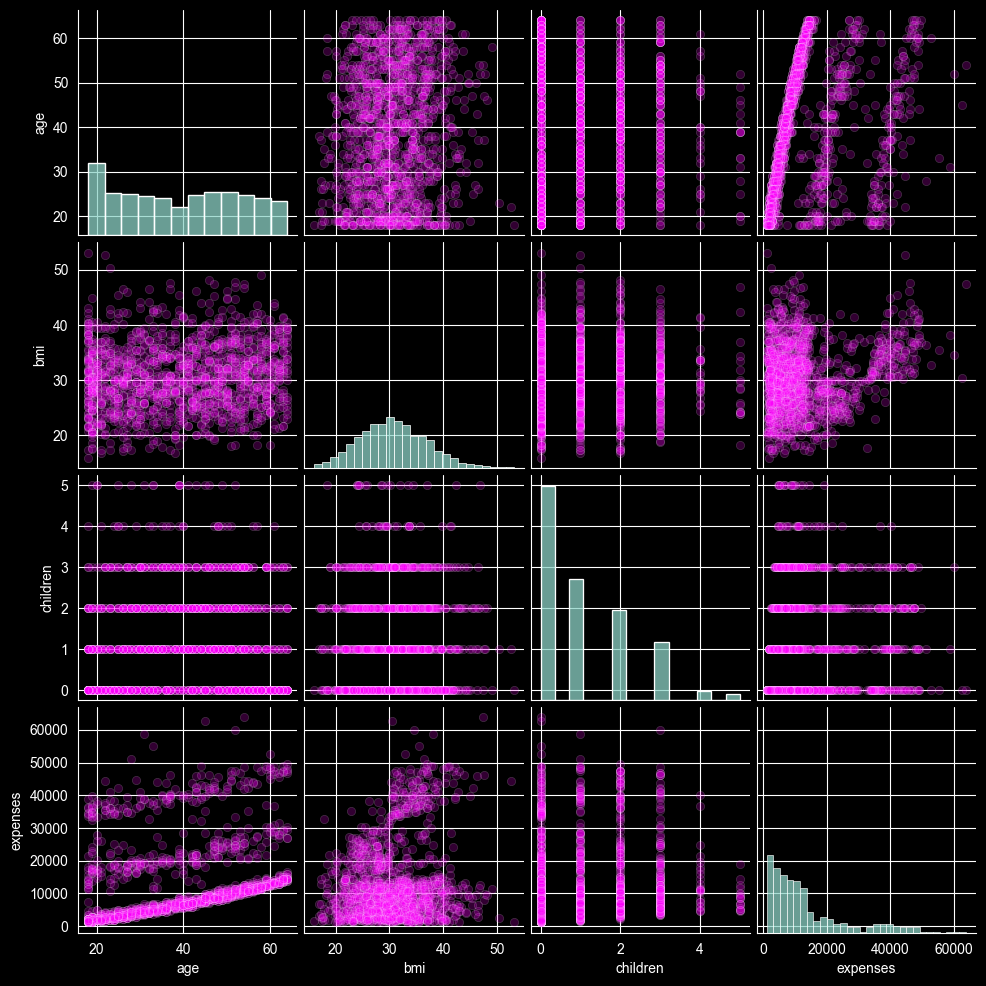

In [211]:
sns.pairplot(df,kind="scatter",plot_kws={"color":"magenta",'alpha' :0.2})

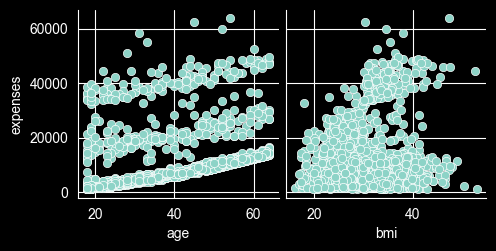

In [212]:
sns.pairplot(df, y_vars='expenses', x_vars=['age', 'bmi'])
plt.show()


In [213]:
X['sex'] = X['sex'].map({'female': 0, 'male': 1})
X['smoker'] = X['smoker'].map({'no': 0, 'yes': 1})
X = pd.get_dummies(X, columns=['region'], drop_first=True)


In [214]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [215]:
X.info

<bound method DataFrame.info of       age  sex   bmi  children  smoker  region_northwest  region_southeast  \
0      19    0  27.9         0       1             False             False   
1      18    1  33.8         1       0             False              True   
2      28    1  33.0         3       0             False              True   
3      33    1  22.7         0       0              True             False   
4      32    1  28.9         0       0              True             False   
...   ...  ...   ...       ...     ...               ...               ...   
1333   50    1  31.0         3       0              True             False   
1334   18    0  31.9         0       0             False             False   
1335   18    0  36.9         0       0             False              True   
1336   21    0  25.8         0       0             False             False   
1337   61    0  29.1         0       1              True             False   

      region_southwest  
0     

In [216]:
X_train = X.sample(frac=0.8, random_state=42)
X_test = X.drop(X_train.index)

y_train = y.loc[X_train.index]
y_test  = y.loc[X_test.index]

In [217]:
X_train_np = X_train.to_numpy(dtype=float)
X_test_np  = X_test.to_numpy(dtype=float)

y_train_np = y_train.to_numpy(dtype=float)
y_test_np  = y_test.to_numpy(dtype=float)

y_mean = y_train_np.mean()
y_std = y_train_np.std()


y_train_scaled = (y_train_np - y_mean) / y_std
y_test_scaled = (y_test_np - y_mean) / y_std

reg = LinearRegressionScratch()
reg.fit(X_train_np, y_train_scaled)


pred_scaled = reg.predict(X_test_np)
predictions = pred_scaled * y_std + y_mean

In [218]:
mean = X_train_np.mean(axis=0)
std  = X_train_np.std(axis=0)

binary_mask = np.all(np.isin(X_train_np, [0, 1]), axis=0)

mean[binary_mask] = 0
std[binary_mask]  = 1

std[std == 0] = 1

X_train_np = (X_train_np - mean) / std
X_test_np  = (X_test_np  - mean) / std


In [219]:
reg = LinearRegressionScratch()
reg.fit(X_train_np, y_train_np)

predictions = reg.predict(X_test_np)

In [220]:
predictions

array([ 9620.53566843, 12063.3650844 , 16491.85030578, 18372.57867706,
       14011.28752095, 16129.6878845 , 10464.8489525 , 13794.56112125,
       17209.19024379,  7308.68212541,  8077.73219973, 18177.65991079,
       12214.65322622, 13291.87331958, 12797.97390124, 11706.50019885,
       18147.5803651 , 21997.92918995, 11334.91986325,  6876.66530952,
        7878.32729433, 13876.30963276,  7895.84994259, 10649.52407798,
       19793.10604841, 10062.64485717, 13354.42690644, 12778.14299125,
       12970.52969909, 16795.990248  , 15321.58711084, 11230.06143293,
       10036.67706678, 10844.13109157, 10764.90604581, 12910.80239916,
        8393.07211343, 13846.18840492, 13431.91908828,  9602.64013925,
       14458.7569584 , 17055.70373224, 12839.00975428,  7523.3153421 ,
       16504.47482928, 12781.7014959 , 13473.15153768,  8940.23911648,
       16783.57871652, 21835.96604773, 10625.29127697, 19490.28285292,
       12825.80155463,  6987.31074988, 12016.35394826, 14861.69921223,
      

In [221]:
age = float(input("Enter age: "))
sex = float(input("Enter sex (female=0, male=1): "))
bmi = float(input("Enter BMI: "))
children = float(input("Enter number of children: "))
smoker = float(input("Smoker? (No=0, Yes=1): "))
region = input("Enter region (Northwest, Southeast, Southwest): ").lower()


region_northwest = 1 if region == "northwest" else 0
region_southeast = 1 if region == "southeast" else 0
region_southwest = 1 if region == "southwest" else 0

input_features = [[age, sex, bmi, children, smoker, region_northwest, region_southeast, region_southwest]]

input_np = np.array(input_features, dtype=float)
input_np = (input_np - mean) / std

prediction = reg.predict(input_np)


print(f"Predicted expenses: {prediction[0]}")

print(input_features)

Predicted expenses: 13078.803763846592
[[19.0, 0.0, 27.9, 0.0, 1.0, 0, 0, 1]]


In [222]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_np, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)


MSE: 97903469.69794036
RMSE: 9894.61821890771
R2 score: 0.37283845784638936


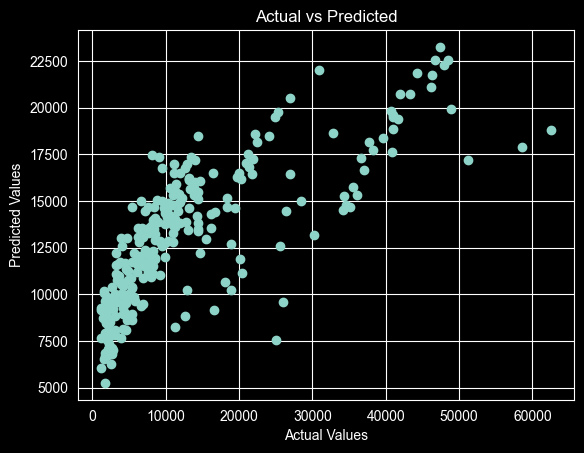

In [223]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test_np,predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
